In [1]:
import json
from pathlib import Path
import conllu
from io import open
from conllu import parse_incr

In [411]:
from io import open
from pathlib import Path
from conllu import parse_incr
from conllu import parse
from collections import Counter
import pandas as pd

In [412]:
gum_sents = Path('filtered_out.conllu').read_text().strip().split('\n\n')

In [413]:
relative_clauses = []
free_relatives =[]
for sent in gum_sents:
    for token in parse(sent):
        for i, t in enumerate(token):
            if t['deprel'] =='acl:relcl':
                head_id = int(t['head'])-1
                head = token[head_id]['xpos']
                if head not in ['WDT', 'WP', 'WRB']:
                    relative_clauses.append(sent)
                else:
                    free_relatives.append(sent)
relative_clauses = set(relative_clauses)
free_relatives = set(free_relatives)

In [414]:
len(free_relatives)

100

In [415]:
gums = ['filtered_out.conllu']
gum_sents =[]
for gum in gums:
    sents = Path(gum).read_text().strip().split('\n\n')
    gum_sents.extend(sents)

In [425]:
def read_preannoated_sents(conllu):
    relative_types = []
    file = open(conllu, 'r')
    sents = [x for x in parse_incr(file)]
    for j, sent in enumerate(sents):
        for i, token in enumerate(sent):
            if token['misc']:
                if 'Cxn' in token['misc']:
                    relative_types.append(token['misc']['Cxn'])
                
    return relative_types

relative_types = read_preannoated_sents('filtered_out.conllu')

#     
    

In [426]:
relative_types = [x for x in relative_types if 'cleft' not in x]
Counter(relative_types).most_common()

[('rc-full-nsubj', 761),
 ('rc-red-missingedep', 473),
 ('rc-full-obj', 157),
 ('rc-full-obl', 115),
 ('rc-full-pass', 95),
 ('rc-free-obj', 79),
 ('rc-free-nsubj', 29),
 ('rc-free-obl', 24),
 ('rc-free-pred', 12),
 ('rc-red-obj', 12),
 ('rc-full-poss', 12),
 ('rc-full-pred', 7),
 ('rc-red-obl', 5),
 ('rc-red-nsubj', 5),
 ('rc-full-ccomp', 4),
 ('rc-free-xcomp', 2),
 ('rc-free-pass', 2),
 ('rc-free-xcomp_xcomp', 1),
 ('rc-red-pass', 1),
 ('rc-red-pred', 1),
 ('rc-full-nmod_xcomp', 1)]

In [321]:
print(len(relative_clauses))

1494


In [418]:
with open('relative_ewt/relative.txt', 'w') as relative:
    for sent in relative_clauses:
        for s in sent.split('\n'):
            if s.startswith('# text = '):
                raw = s[len('# text ='):-1] +' '+s[-1]
                relative.write(f'{raw}\n')

In [419]:
with open('relative_ewt/relative.conllu', 'w') as conllu:
    for sent in relative_clauses:
        conllu.write(f'{sent}\n\n')

In [472]:
file = open('relative_ewt/relative.conllu', 'r')
sents = [x for x in parse_incr(file)]

In [431]:
len(sents)

1494

In [459]:
from collections import Counter
pc =[]
prc =[]
advc =[]
advrc =[]
gc =[]
sc =[]
src =[]
sc_sentid = []
oc =[]
orc =[]
others =[]
others_r =[]
m =[]
relative_clauses = list(relative_clauses)

'''
if token['deprel'] =='acl:relcl':
    head_dep = [x for x in sent if x['id']==token['head']][0]
    head_deps = [x[1] for x in head_dep['deps'] if x[1]==token['id']]
    if head_deps==[] and head_dep['xpos'] not in ['WDT', 'WP']: 
        that_position = [x['id'] for x in sent if x['id'] ==token['head']][0]
'''
print(len(relative_clauses))
for j, sent in enumerate(sents):
    tokens = [tok for tok in sent]
    ts = [tok['form'] for tok in sent]
    raw_text = ' '.join(ts)
    for i, token in enumerate(sent):
        if token['deprel']=='acl:relcl': #find the head reduced relative clause
           # if token['misc'] and 'Cxn' in token['misc']:
            head_dep = [x for x in sent if x['id']==token['head']][0]
            depents_id = [x['id'] for x in tokens if x['head'] ==token['id'] and x['deprel'] in ['xcomp', 'ccomp']] # relative predicates
            preds_id = [token['id']]+depents_id
            
            deps_deps_id = [x['id'] for x in tokens if x['head'] in preds_id]+preds_id
            dependents = [x for x in tokens if x['head'] in preds_id] #trying to find relative prnouns 
            dependents =[x for x in dependents if x['feats']!= None and 'Rel' in list(x['feats'].values())]#relative pronoun
            head_deps = [x[0] for x in head_dep['deps'] if x[1] in preds_id] # if we can find the enhanced depdency relations or not
            head_deps = sorted(head_deps, key = lambda x: (x==token['id']), reverse=True)
            dep_dep = [x['form'] for x in tokens if x['head'] in deps_deps_id]
            whose = [x for x in dep_dep if x=='whose']
            s = [x['form'] for x in tokens]
            if head_dep['xpos'] not in ['WDT', 'WP', 'WRB', 'GW']: #filter out free relatives
                if whose:
                    gc.append(relative_clauses[j])
                else:
                    if head_deps and dependents: # if we can find the eud relations from the annotation of the head 
                        dep = head_deps[0]
                        if 'pass' in dep: 
                            if relative_clauses[j] not in pc:
                                # if 'pass' not in token['misc']['Cxn']:
                                #     print(f'pass {raw_text}')
                                pc.append(relative_clauses[j])
                                    
                        elif 'subj' in dep:
                            if relative_clauses[j] not in sc:
                                # if 'subj' not in token['misc']['Cxn']:
                                #     print(f'subj {raw_text}')
                                sc.append(relative_clauses[j])
                                sc_sentid.append(sent.metadata['sent_id'])
                                    
                        elif 'obj' in dep:
                            if relative_clauses[j] not in oc:
                                # if 'obj' not in token['misc']['Cxn']:
                                    # print(f'obj {raw_text}')
                                oc.append(relative_clauses[j])
                                    
                        # elif 'obl:' in dep:
                        #     if relative_clauses[j] not in advc:
                        #         advc.append(relative_clauses[j])
                        elif 'obl' in dep or 'adv' in dep:
                            # obj_dep = [x for x in tokens if x['head'] == dependents[0]['id'] and x['deprel']=='case']
                            # if obj_dep and relative_clauses[j] not in oc:
                            #     oc.append(relative_clauses[j])
                            if relative_clauses[j] not in advc:
                                # if 'obl' not in token['misc']['Cxn']:
                                #     print(f'obl {raw_text}')
                                advc.append(relative_clauses[j])
                        else:
                            m.append(relative_clauses[j])
                    else:
                        # if 'red' not in token['misc']['Cxn']:
                        if head_deps and relative_clauses[j] not in others:
                            others.append(relative_clauses[j])
                            
                            # print(f'red {raw_text}')
                        else:
                            if relative_clauses[j] not in others_r:
                                others_r.append(relative_clauses[j])
                                # print(f'red {raw_text}')

1494


In [382]:
print(len(gc))

12


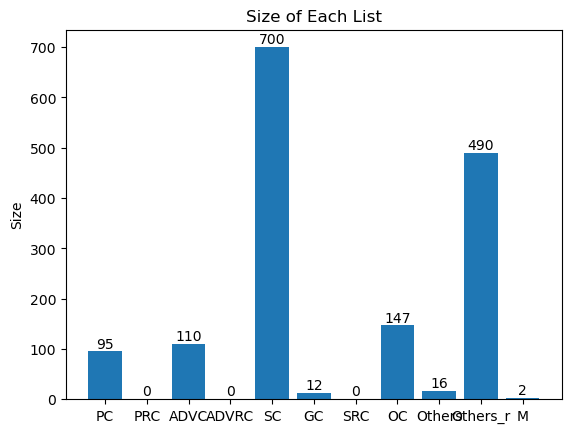

In [452]:

import matplotlib.pyplot as plt

# Data
labels = ['PC', 'PRC', 'ADVC', 'ADVRC', 'SC', 'GC', 'SRC', 'OC',  'Others', 'Others_r', 'M']
sizes = [len(pc), len(prc), len(advc), len(advrc), len(sc), len(gc), len(src), len(oc), len(others), len(others_r), len(m)]

# Plot
fig, ax = plt.subplots()
bars = ax.bar(labels, sizes)

# Adding value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 1, yval, ha='center', va='bottom')

ax.set_ylabel('Size')
ax.set_title('Size of Each List')
plt.show()

In [466]:
file_ewt = open('filtered_out.conllu', 'r')
sents_ewt = [x for x in parse_incr(file_ewt)]
sc_ewt =[]
for j, sent in enumerate(sents_ewt):
    
    tokens = [tok for tok in sent]
    ts = [tok['form'] for tok in sent]
    raw_text = ' '.join(ts)
    for i, token in enumerate(sent):
        if token['deprel']=='acl:relcl': 
            if token['misc'] and 'Cxn' in token['misc']:
                if 'subj' in token['misc']['Cxn'] and 'free' not in token['misc']['Cxn']:
                    if sent.metadata['sent_id'] not in sc_ewt:
                        sc_ewt.append(sent.metadata['sent_id'])
                    
                

In [467]:
difference = [x for x in sc_ewt if x not in sc_sentid]

In [468]:
difference

['weblog-typepad.com_ripples_20040407125600_ENG_20040407_125600-0051',
 'weblog-blogspot.com_alaindewitt_20060924104100_ENG_20060924_104100-0144',
 'weblog-blogspot.com_dakbangla_20050311135387_ENG_20050311_135387-0009',
 'newsgroup-groups.google.com_IndiaNewsWindow_1405662573fa84ed_ENG_20050831_110400-0015',
 'answers-20111108094740AA1lbom_ans-0004',
 'answers-20111107155912AAS93e5_ans-0013']

In [390]:
def save_relative_split(file_name, relative_split):
    with open(file_name, 'w') as relative:
        
        for sent in relative_split:
            for s in sent.split('\n'):
                if s.startswith('# text = '):
                    raw = s[len('# text ='):-1].strip() +' '+s[-1]
                    relative.write(f'{raw}\n')

In [469]:
save_relative_split('relative_ewt/advc.txt', advc)
save_relative_split('relative_ewt/others_r.txt', others_r)
save_relative_split('relative_ewt/others.txt', others)
save_relative_split('relative_ewt/sc.txt', sc)
save_relative_split('relative_ewt/oc.txt',oc)
save_relative_split('relative_ewt/pc.txt',pc)
save_relative_split('relative_ewt/gc.txt',gc)

In [294]:
def save_relative_conllu(file_name, relative_split):
    with open(file_name, 'w') as relative:
       
        for sent in relative_split:
            relative.write(f'{sent}\n\n')

In [295]:
save_relative_conllu('relative_gum/advc.conllu', advc)
save_relative_conllu('relative_gum/others_r.conllu', others_r)
save_relative_conllu('relative_gum/others.conllu', others)
save_relative_conllu('relative_gum/sc.conllu', sc)
save_relative_conllu('relative_gum/oc.conllu',oc)
save_relative_conllu('relative_gum/pc.conllu',pc)
save_relative_conllu('relative_gum/gc.conllu',gc)

# EUD

In [296]:
reduced = open('relative_gum/others_r.conllu', 'r')
sents_reduced = [x for x in parse_incr(reduced)]

In [297]:
def add_relative_pronoun(sents_reduced):
    wrong_annotation = []
    all_sents = []
    all_that_ids = []
    cops = []
    for k, sent in enumerate(sents_reduced):
        raw_sent = []
        that_id =[]
        num_reduced =0 #how many reduced relatives in one sentence
        for i,  token in enumerate(sent):
            try:
                if '-' not in str(token['id']):
                    raw_sent.append(token['form'])
                    if token['deprel'] =='acl:relcl': #find the predicate verb in the relative clause
                        if token['lemma'] =='be':
                            cops.append(k)
                        head_dep = [x for x in sent if x['id']==token['head']][0] #find the head token
                        head_deps = [x['xpos'] for x in sent if x['head']==token['id']]
                        head_deps = [x for x in head_deps if x in ['WDT', 'WP', 'WRB']]
                        if head_deps==[] and head_dep['xpos'] not in ['WDT', 'WP', 'WRB']: 
                            that_position = [x['id'] for x in sent if x['id'] ==token['head']][0]
                            raw_sent.insert(that_position+num_reduced, 'that')
                            that_id.append((that_position+num_reduced+1, token['head'], token['id']))
                            num_reduced+=1
                           
                            assert str(raw_sent[that_position+num_reduced-2]) == str(head_dep['form'])
            except AssertionError:
                print(raw_sent)
                wrong_annotation.append(sent.serialize())
                print(len(wrong_annotation))
                continue
        if that_id ==[]:
            print(raw_sent)
        all_sents.append(raw_sent)
        all_that_ids.append(that_id)
            
    return all_sents, all_that_ids, wrong_annotation, cops
                      
gum_sent_with_that, gum_that_ids, gum_wrong_annotation, cops_id= add_relative_pronoun(sents_reduced)

In [276]:
cops_id

[1, 172, 175, 178, 192, 228]

In [277]:
import stanza 
stanza.download('en')

2023-11-27 13:30:13 INFO: Downloading default packages for language: en (English)...
2023-11-27 13:30:20 INFO: File exists: /Users/xiulinyang/stanza_resources/en/default.zip.
2023-11-27 13:30:28 INFO: Finished downloading models and saved to /Users/xiulinyang/stanza_resources.


In [179]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos,lemma,depparse', tokenize_pretokenized=True)

2023-11-26 18:05:05 WARNING: Can not find mwt: default from official model list. Ignoring it.
2023-11-26 18:05:05 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |
| lemma     | combined |
| depparse  | combined |

2023-11-26 18:05:05 INFO: Use device: cpu
2023-11-26 18:05:05 INFO: Loading: tokenize
2023-11-26 18:05:05 INFO: Loading: pos
2023-11-26 18:05:07 INFO: Loading: lemma
2023-11-26 18:05:07 INFO: Loading: depparse
2023-11-26 18:05:10 INFO: Done loading processors!


In [298]:
def add_enhanced_rule(sents, that_ids, original_sents, cops_id):
    
    with open('eud_others_r.conllu', 'w') as conllu, open('relative_gum/advrc.conllu', 'w') as advrc, open('relative_gum/orc.conllu', 'w') as orc:
        advr =[]
        obj =[]
        advr_idx =[]
        obj_idx=[]
        cops =[]
        for i, sent in enumerate(sents):
            # print(' '.join(sent))
            print(' '.join(sent))
            if i in cops_id:
                
                cops.append(sent)
            else:  
                print(sent)
                parsed_sent = nlp([sent]).sentences[0]
                for id in that_ids[i]:
                    deprel = [token.deprel for token in parsed_sent.words if token.id==id[0]][0]
                    head_index = [j for j, x in enumerate(original_sents[i]) if x['id']==id[1]][0]
                    if deprel in ['nsubj', 'nsubj:pass', 'reparandum', 'acl:relcl', 'nmod:npmod', 'nmod']:
                        continue
                    if deprel in ['mark', 'obl']:
                        # obj_dep = [x for x in tokens if x['head'] == dependents[0]['id'] and x['deprel']=='case']
                        original_sents[i][head_index]['deps'].append(('obl', id[2]))
                        if i not in advr_idx+cops_id:
                            advrc.write(original_sents[i].serialize())
                            advr_idx.append(i)
                            advr.append(original_sents[i])
                    else: 
                        original_sents[i][head_index]['deps'].append((deprel, id[2]))
                        if i not in obj_idx+cops_id:
                            orc.write(original_sents[i].serialize())
                            obj_idx.append(i)
                            obj.append(original_sents[i])
                    # for debug
                    # relations.append(deprel)
                    # print(id[1], deprel, id[2])
                conllu.write(original_sents[i].serialize())
    return obj, advr
orc_that, advr_that = add_enhanced_rule(gum_sent_with_that, gum_that_ids, sents_reduced, cops_id)

The reason that I 'm taking it like this early is because I have my med school class at two to four thirty , so we have three hours 45 minutes to take it .
['The', 'reason', 'that', 'I', "'m", 'taking', 'it', 'like', 'this', 'early', 'is', 'because', 'I', 'have', 'my', 'med', 'school', 'class', 'at', 'two', 'to', 'four', 'thirty', ',', 'so', 'we', 'have', 'three', 'hours', '45', 'minutes', 'to', 'take', 'it', '.']
I felt horrible doing that on that eye dog that he had in here last week , under whatever night that it was .
These are the things that I 've gotten done , so I got this done , got this done , got this done .
['These', 'are', 'the', 'things', 'that', 'I', "'ve", 'gotten', 'done', ',', 'so', 'I', 'got', 'this', 'done', ',', 'got', 'this', 'done', ',', 'got', 'this', 'done', '.']
Pack a separate box of essentials that you may need for the first night at your new house .
['Pack', 'a', 'separate', 'box', 'of', 'essentials', 'that', 'you', 'may', 'need', 'for', 'the', 'first', 'ni

In [300]:
advrc_rel = Path('relative_gum/advrc.conllu').read_text().strip().split('\n\n')
with open('relative_gum/advrc.txt', 'w') as rel:
    for sent in advrc_rel:
        for s in sent.split('\n'):
            if s.startswith('# text = '):
                raw = s[len('# text ='):-1].strip() +' '+s[-1]
                rel.write(f'{raw}\n')

# Rule-based EUD v1

In [549]:
file_all = open('en_ewt-ud-train.conllu', 'r')
sents_all = [x for x in parse_incr(file_all)]

verb_argument ={}
for sent in sents_all:
    for token in sent:

        if token['xpos'] and 'VB' in token['xpos']:
            lemma = token['lemma']
            dependents = [x['deprel'] for x in sent if x['head']==token['id'] if x['deprel'] not in ['nsubj', 'punct']]
            if lemma not in verb_argument:
                verb_argument[lemma]=dependents
            else:
                verb_argument[lemma].extend(dependents)

def get_most_common(verb_argument, token):
    most_common = Counter(verb_argument[token]).most_common(3)
    most_common = [x[0] for x in most_common]
    return most_common
    

get_most_common(verb_argument, 'need')

['xcomp', 'obj', 'advmod']

In [561]:


df = pd.read_csv('verb_transitivity.tsv', sep='\t')

# Initialize an empty dictionary
verb_dict = {}

# Iterate through each row
for index, row in df.iterrows():
    verb = row['verb']
    max_percent = max(row['percent_intrans'], row['percent_trans'], row['percent_ditrans'])

    if max_percent > 0.5:
        if max_percent == row['percent_intrans']:
            verb_dict[verb] = 'intrans'
        elif max_percent == row['percent_trans']:
            verb_dict[verb] = 'trans'
        else:
            verb_dict[verb] = 'ditrans'
            
    if verb in verb_argument:
        if 'xcomp' in get_most_common(verb_argument, verb) or 'obj' in get_most_common(verb_argument, verb):
            verb_dict[verb]='trans'
        elif 'ccomp' in get_most_common(verb_argument, verb):
            verb_dict[verb]='intrans'

for k, v in verb_argument.items():
    if k not in verb_dict:
        if 'xcomp' in get_most_common(verb_argument, k) or 'obj' in get_most_common(verb_argument, k):
            verb_dict[k]='trans'
        else:
            verb_dict[k]='instrans'
        
            
        

In [562]:
verb_dict['think']

'intrans'

In [578]:
reduced = open('relative_ewt/others_r.conllu', 'r')
sents_reduced = [x for x in parse_incr(reduced)]

In [579]:
def find_deps_comp(sent, xcomp_id):
    return [x['deprel'] for x in sent if x['head']==xcomp_id]

In [580]:

def eud_transformation(sents):
    # to debug
    # all_possible_deps = []
    mannual_annotation=[]
    advrc =[]
    orc =[]
    advrc_sentid =[]
    orc_sentid =[]
    cops =[]
    special_cases = ['xcomp', 'ccomp']
    for j, sent in enumerate(sents):
        sent_id = sent.metadata['sent_id']
        for token in sent:
            if token['deprel'] =='acl:relcl': #find the predicate verb in the relative clause
                token_id = [k for k, x in enumerate(sent) if x['id']==token['id']][0]
                head_dep = [x for x in sent if x['id']==token['head']][0] #find the head token
                head_deps = [x['xpos'] for x in sent if x['head']==token['id']]
                all_deps = [x for x in sent if x['head']==token['id']]
                all_deps_deprels = [x['deprel'] for x in all_deps]
                
                if not set(special_cases).isdisjoint(set(all_deps_deprels)):
                    xcomp_id = [x['id'] for x in all_deps if x['deprel'] in special_cases][0]
                    all_deps_deprels.extend(find_deps_comp(sent, xcomp_id))
                    mannual_annotation.append(sent)
                for d in all_deps:
                    if 'obl' in d['deprel']:
                        dep_obl = [x['deprel'] for x in sent if x['head']==d['id']]
                        if 'case' in dep_obl:
                            all_deps_deprels.remove(d['deprel'])
                    
                head_deps = [x for x in head_deps if x in ['WDT', 'WP', 'WRB']]
                if head_deps==[] and head_dep['xpos'] not in ['WDT', 'WP', 'WRB']:#find the reduced head and filter out the free relative clauses
                    head_index = [j for j, x in enumerate(sent) if x['id']==head_dep['id']][0]
                    if token['lemma'] =='be': #filter out copula sentences
                        cops.append(sent)
                    elif 'VB' in token['xpos']:
                        verb = token['lemma']
                        if verb in verb_dict:
                            if verb_dict[verb] in ['trans', 'ditrans']:
                                if 'obj' not in all_deps_deprels:
                                    
                                    if sent_id not in orc_sentid:
                                        sent[head_index]['deps'].append(('obj', token['id']))
                                        orc.append(sent)
                                        orc_sentid.append(sent_id)
                                    else:
                                        orc[-1][head_index]['deps'].append(('obj', token['id']))
                                # 
                                # elif 'obl' in all_deps_deprels:
                                #     
                                #     # sent[head_index]['deps'].append(('obl', token['id']))
                                #     # orc.append(sent)
                                else:
                                    if sent_id not in advrc_sentid:
                                        sent[head_index]['deps'].append(('obl', token['id']))
                                        advrc.append(sent)
                                        advrc_sentid.append(sent_id)
                                    else:
                                        advrc[-1][head_index]['deps'].append(('obl', token['id']))
                                    # 
                                    # advrc.append(sent)
                            if verb_dict[verb]=='intrans':
                                if sent_id not in advrc_sentid:
                                    sent[head_index]['deps'].append(('obl', token['id']))
                                    advrc.append(sent)
                                    advrc_sentid.append(sent_id)
                                else:
                                    advrc[-1][head_index]['deps'].append(('obl', token['id']))
                                   
                        else:
                            if 'obj' not in all_deps_deprels:
                                if sent_id not in orc_sentid:
                                    sent[head_index]['deps'].append(('obj', token['id']))
                                    orc.append(sent)
                                    orc_sentid.append(sent_id)
                                else:
                                    orc[-1][head_index]['deps'].append(('obj', token['id']))
                                    # sent[head_index]['deps'].append(('obj', token['id']))
                                    # orc.append(sent)
                                
                            else:
                                if sent_id not in advrc_sentid:
                                    sent[head_index]['deps'].append(('obl', token['id']))
                                    advrc.append(sent)
                                    advrc_sentid.append(sent_id)
                                else:
                                    advrc[-1][head_index]['deps'].append(('obl', token['id']))
                                   
                                    # sent[head_index]['deps'].append(('obl', token['id']))
                                    # advrc.append(sent)
                    else:
                        if sent_id not in advrc_sentid:
                            sent[head_index]['deps'].append(('obl', token['id']))
                            advrc.append(sent)
                            advrc_sentid.append(sent_id)
                        else:
                            advrc[-1][head_index]['deps'].append(('obl', token['id']))
                                   
                        # sent[head_index]['deps'].append(('obl', token['id']))
                        # advrc.append(sent)
                    
    return advrc, orc, cops, mannual_annotation
                
advrc_rule, orc_rule, cops_rule, mannual_annotation_rule = eud_transformation(sents_reduced)

# Rule-based EUD v2

In [581]:
# def eud_transformation_simp(sents):
#     # to debug
#     # all_possible_deps = []
#     mannual_annotation=[]
#     advrc =[]
#     orc =[]
#     cops =[]
#     special_cases = ['xcomp', 'ccomp']
#     for j, sent in enumerate(sents):
#         
#         for token in sent:
#             
#             if token['deprel'] =='acl:relcl': #find the predicate verb in the relative clause
#                 head_dep = [x for x in sent if x['id']==token['head']][0] #find the head token
#                 head_deps = [x['xpos'] for x in sent if x['head']==token['id']]
#                 all_deps = [x for x in sent if x['head']==token['id']]
#                 all_deps_deprels = [x['deprel'] for x in all_deps]
#                 
#                 if not set(special_cases).isdisjoint(set(all_deps_deprels)):
#                     xcomp_id = [x['id'] for x in all_deps if x['deprel'] in special_cases][0]
#                     all_deps_deprels.extend(find_deps_comp(sent, xcomp_id))
#                     mannual_annotation.append(sent)
#                 for d in all_deps_deprelss:
#                     if 'obl' in d['deprel']:
#                         dep_obl = [x['deprel'] for x in sent if x['head']==d['id']]
#                         if 'case' in dep_obl:
#                             all_deps_deprels.remove(d['deprel'])
#                     
#                 head_deps = [x for x in head_deps if x in ['WDT', 'WP', 'WRB']]
#                 if head_deps==[] and head_dep['xpos'] not in ['WDT', 'WP', 'WRB']:#find the reduced head and filter out the free relative clauses
#                     head_index = [j for j, x in enumerate(sent) if x['id']==head_dep['id']][0]
#                     if token['lemma'] =='be': #filter out copula sentences
#                         cops.append(sent)
#                     else:
#                           
#                         if 'obl' in all_deps_deprels:
#                             sent[head_index]['deps'].append(('obl', token['id']))
#                             orc.append(sent)
#                         elif 'obj' not in all_deps_deprels:
#                             sent[head_index]['deps'].append(('obj', token['id']))
#                             orc.append(sent)
#                         
#                         else:
#                             sent[head_index]['deps'].append(('obl', token['id']))
#                             advrc.append(sent)
#                         
#                     
#     return orc, advrc, cops, mannual_annotation
#                 
# orc_rule, advrc_rule, cops_rule, mannual_annotation_rule = eud_transformation_simp(sents_reduced)

In [585]:
def write_to_collu(conllu_file, redcl):
    with open(conllu_file, 'w') as conllu:
        for sent in redcl:
            conllu.write(sent.serialize())  
write_to_collu('relative_ewt/orc.conllu', orc_rule)

In [586]:
advrc_rel = Path('relative_ewt/orc.conllu').read_text().strip().split('\n\n')
with open('relative_ewt/orc.txt', 'w') as rel:
    for sent in advrc_rel:
        for s in sent.split('\n'):
            if s.startswith('# text = '):
                raw = s[len('# text ='):-1] +' '+s[-1]
                rel.write(f'{raw}\n')

In [577]:
verb_dict['get']
# get_most_common(verb_argument, 'think')

'trans'

# control sentences

In [ ]:
import amrlib
from pathlib import Path
stog = amrlib.load_stog_model()
sents = Path('relative_gum/sc.txt').read_text().strip().split('\n')
graphs = stog.parse_sents(sents)
with open('amrlib_output/pred_sc.txt', 'w') as out:
    for graph in graphs:
        out.write(f'{graph}\n\n')

In [95]:
doc = nlp([['This', 'is', 'token.ization', 'done', 'my', 'way!']])
result = doc.sentences[0]
print([tok.deprel for tok in result.words])

# for i, sentence in enumerate(doc.sentences):
#     print(f'====== Sentence {i+1} tokens =======')
#     print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

['nsubj', 'cop', 'root', 'acl', 'nmod:poss', 'obj']


TokenList<She, picked, up, the, pans, in, which, she’d, she, ’d, made, the, potatoes, and, maple, glaze, ., _, metadata={sent_id: "GUM_fiction_claus-39", s_prominence: "1", s_type: "decl", transition: "continue", text: "She picked up the pans in which she’d made the potatoes and maple glaze.", newpar: "None", newpar_block: "p (4 s)"}>

In [154]:
relative_dependent_all =[]
for sent in sents_reduced:
    relative_sents_dependent = []
    for token in sent:
        relative_dependent = []
        if token['deprel'] =='acl:relcl':
            head_dep = [x for x in sent if x['id']==token['head']][0]
            if head_dep['deps'] and head_dep['xpos'] not in ['WDT', 'WP']: 
                head = [x[1] for y in sent if y['id'] ==token['head'] for x in y['deps']]
               
                if token['id'] not in head:
                    depents = [x['deprel'] for x in sent if x['head'] == token['id']]
                # relative_dependent.append(depents)
            
                    relative_sents_dependent.append(depents)
    relative_dependent_all.append(relative_sents_dependent)

In [274]:
relative_dependent_all

In [275]:
len(relative_dependent_all)

In [292]:
for i, rel in enumerate(relative_dependent_all):
    for r in rel:
        if 'nsubj' not in r and 'nsubj:pass' not in r:
            print(i)
            print(rel)
            

In [293]:
others_r = Path('relative_gum/others_r.conllu').read_text().strip().split('\n\n')

In [294]:
print(others_r[62]) #incorrect annotation  what

In [98]:
print(others_r[169]) # incorrect annotation   that

# sent_id = GUM_news_warhol-46
# s_prominence = 1
# s_type = decl
# transition = continue
# text = Warhol was close to important touchstones of the 1960s, including art, music, consumer culture, fashion, and celebrity worship, which were all buzzwords and images Wikinews observed at USI's opening exhibit.
# newpar
# newpar_block = p (1 s)
1	Warhol	Warhol	PROPN	NNP	Number=Sing	3	nsubj	3:nsubj	Discourse=joint-other_m:94->11:9|Entity=(2-person-giv:act-cf1*-1-coref-Andy_Warhol)
2	was	be	AUX	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	3	cop	3:cop	_
3	close	close	ADV	RB	Degree=Pos	0	root	0:root	_
4	to	to	ADP	IN	_	6	case	6:case	_
5	important	important	ADJ	JJ	Degree=Pos	6	amod	6:amod	Entity=(166-person-new-cf11-2-sgl
6	touchstones	touchstone	NOUN	NNS	Number=Plur	3	obl	3:obl:to	_
7	of	of	ADP	IN	_	9	case	9:case	_
8	the	the	DET	DT	Definite=Def|PronType=Art	9	det	9:det	Entity=(167-time-acc:com-cf6-2-sgl
9	1960s	1960s	NOUN	NNS	Number=Plur	6	nmod	6:nmod:of	Entity=167)166)|SpaceAfter=No

In [307]:
print(others_r[371]) # incorrect annotation

In [308]:
print(others_r[217])

{'0': [{'type': 'reentrancy:primary',
   'tokens': [8],
   'nodes': [],
   'edges': [['1.1.2.1.1.1', ':ARG2', '1.1.2.1.1.1.2']]},
  {'type': 'reentrancy:primary',
   'tokens': [25],
   'nodes': [],
   'edges': [['1.2.3.1', ':ARG1', '1.2.2']]},
  {'type': 'reentrancy:primary',
   'tokens': [8],
   'nodes': [],
   'edges': [['1.1.2.1.1.1', ':ARG1', '1.1.2.1.1.1.1']]},
  {'type': 'reentrancy:primary',
   'tokens': [1],
   'nodes': [],
   'edges': [['1.1', ':ARG0', '1.1.1']]},
  {'type': 'reentrancy:coref',
   'tokens': [16],
   'nodes': [],
   'edges': [['1.1.2.1.1.1.2.1.2.1.2', ':ARG1', '1.1.2.1.1.1.2']],
   'string': "reentrancy:coref : their => ('dedicate-01', ':ARG1', 'person')"},
  {'type': 'reentrancy:coref',
   'tokens': [13],
   'nodes': [],
   'edges': [['1.1.2.1.1.1.2.1.2.1.1', ':ARG1', '1.1.2.1.1.1.2']],
   'string': "reentrancy:coref : it => ('capable-01', ':ARG1', 'person')"},
  {'type': 'reentrancy:coref',
   'tokens': [11],
   'nodes': [],
   'edges': [['1.1.2.1.1.1.2.1', '

In [113]:
print(others_r[167])

# sent_id = GUM_interview_shalev-70
# s_prominence = 1
# s_type = decl
# speaker = AnerShalev
# transition = continue
# text = I think by using emails on the one hand which are more the voice of the woman Eva and narrative which is more the perspective of the man Adam, I kind of confront them, their different perspective and then kind somehow you can see the distortions in the way the story is told.
1	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	2	nsubj	2:nsubj	Discourse=attribution-positive:149->150:3|Entity=(3-person-giv:act-cf1*-1-ana-Aner_Shalev)
2	think	think	VERB	VBP	Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin	34	ccomp	34:ccomp	_
3	by	by	SCONJ	IN	_	4	mark	4:mark	Discourse=joint-other_m:150->143:2
4	using	use	VERB	VBG	VerbForm=Ger	2	advcl	2:advcl:by	_
5	emails	email	NOUN	NNS	Number=Plur	4	obj	4:obj|14:nsubj	Entity=(135-abstract-giv:inact-cf6-1-coref
6	on	on	ADP	IN	_	9	case	9:case	_
7	the	the	DET	DT	Definite=Def|PronType=Art	9	det	9:det	_
8	one	one	NUM	CD	NumFo

In [121]:
print(others_r[14]) # annotation error

# sent_id = GUM_academic_lighting-8
# s_prominence = 4
# s_type = decl
# transition = establishment
# text = There are different type of lighting bulbs used at home can affect the overall lighting consumption.
1	There	there	PRON	EX	PronType=Dem	2	expl	2:expl	Discourse=context-background:11->14:1
2	are	be	VERB	VBP	Mood=Ind|Number=Plur|Person=3|Tense=Pres|VerbForm=Fin	0	root	0:root	_
3	different	different	ADJ	JJ	Degree=Pos	4	amod	4:amod	Entity=(31-abstract-new-cf3-2-sgl
4	type	type	NOUN	NN	Number=Sing|Typo=Yes	2	nsubj	2:nsubj	CorrectForm=types|XML=<sic ana:::"types"></sic>
5	of	of	ADP	IN	_	7	case	7:case	_
6	lighting	lighting	NOUN	NN	Number=Sing	7	compound	7:compound	Entity=(32-object-new-cf5-2-sgl
7	bulbs	bulb	NOUN	NNS	Number=Plur	4	nmod	4:nmod:of	_
8	used	use	VERB	VBN	Tense=Past|VerbForm=Part	7	acl	7:acl	Discourse=elaboration-attribute:12->11:0
9	at	at	ADP	IN	_	10	case	10:case	_
10	home	home	NOUN	NN	Number=Sing	8	obl	8:obl:at	Entity=(30-place-giv:act-cf1*-1-coref)32)31)
11	can	can	AUX	M

In [122]:
print(others_r[62])

# sent_id = GUM_vlog_hair-49
# s_prominence = 4
# s_type = sub
# speaker = Shawnta
# transition = smooth-shift
# text = So I could not come out with a cream and tell you guys just – "You can use it on your wash-n-go's" when that would kinda go against all that I've always said on my channel, which is "Gels actually are what make your wash-n-go stay."
1	So	so	ADV	RB	_	5	advmod	5:advmod	Discourse=adversative-concession:102->98:0
2	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	5	nsubj	5:nsubj|11:nsubj	Entity=(3-person-giv:act-cf1*-1-ana)
3	could	could	AUX	MD	VerbForm=Fin	5	aux	5:aux|11:aux	_
4	not	not	PART	RB	Polarity=Neg	5	advmod	5:advmod	_
5	come	come	VERB	VB	VerbForm=Inf	0	root	0:root	_
6	out	out	ADP	RP	_	5	compound:prt	5:compound:prt	_
7	with	with	ADP	IN	_	9	case	9:case	_
8	a	a	DET	DT	Definite=Ind|PronType=Art	9	det	9:det	Entity=(61-substance-new-cf4-2-coref
9	cream	cream	NOUN	NN	Number=Sing	5	obl	5:obl:with	Entity=61)
10	and	and	CCONJ	CC	_	11	cc	11:cc	Discourse=attribution-

In [124]:
print(others_r[320]) # incorrect annotation?

# sent_id = GUM_voyage_sydfynske-45
# s_prominence = 3
# s_type = multiple
# transition = null
# text = Islands in the archipelago listed in east to west order; note that there are many more islands and islets in the area, but these are the ones with ferry traffic that are possible to visit without making special arrangements.
# newpar
# newpar_block = p (4 s)
1	Islands	island	NOUN	NNS	Number=Plur	0	root	0:root	Discourse=organization-preparation:128->159:6|Entity=(189-place-new-cf1-1-coref
2	in	in	ADP	IN	_	4	case	4:case	_
3	the	the	DET	DT	Definite=Def|PronType=Art	4	det	4:det	Entity=(1-place-giv:inact-cf2-2-coref-South_Funen_Archipelago
4	archipelago	archipelago	NOUN	NN	Number=Sing	1	nmod	1:nmod:in	Entity=1)
5	listed	list	VERB	VBN	Tense=Past|VerbForm=Part	1	acl	1:acl	Discourse=elaboration-attribute:129->128:0
6	in	in	ADP	IN	_	10	case	10:case	_
7	east	east	NOUN	NN	Number=Sing	10	nummod	10:nummod	Entity=(190-abstract-new-cf5-4-sgl(191-place-new-cf6-1-sgl)
8	to	to	ADP	IN	_	9	case	9:case	_

In [229]:
print(others_r[388])

In [239]:
print(others_r[100]) #TODO: recursion needed when xcomp appears

In [240]:
print(others_r[194]) #annotation error?

In [232]:
print(others_r[14])

1	And	and	CCONJ	CC	_	3	cc	3:cc	Discourse=explanation-justify:14->52:3
2	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	3	nsubj	3:nsubj	Entity=(2-person-giv:inact-cf1-1-ana)
3	remember	remember	VERB	VBP	Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin	0	root	0:root	_
4	this	this	DET	DT	Number=Sing|PronType=Dem	6	det	6:det	Entity=(4-object-acc:com-cf2-10-coref
5	pf-	pf-	INTJ	UH	_	6	reparandum	6:reparandum	_
6	cartoon	cartoon	NOUN	NN	Number=Sing	3	obj	3:obj|8:obj	_
7	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	8	nsubj	8:nsubj	Discourse=elaboration-attribute:15->14:0|Entity=(2-person-giv:act-cf1-1-ana)
8	saw	see	VERB	VBD	Mood=Ind|Number=Sing|Person=1|Tense=Past|VerbForm=Fin	6	acl:relcl	6:acl:relcl	_
9	w-	w-	INTJ	UH	_	17	reparandum	17:reparandum	SpaceAfter=No
10	,	,	PUNCT	,	_	9	punct	9:punct	_
11	of	of	ADP	IN	_	17	reparandum	17:reparandum	Discourse=same-unit_m:16->14:1|SpaceAfter=No
12	,	,	PUNCT	,	_	11	punct	11:punct	_
13	of	of	ADP	IN	_	17	reparandum	17:reparandum	

In [143]:
print(others_r[60]) #incorrect annotation

# sent_id = GUM_news_crane-7
# s_prominence = 3
# s_type = decl
# transition = null
# text = Photos released of the scene showed numerous bloodied bodies and various scattered debris.
1	Photos	photo	NOUN	NNS	Number=Plur	6	nsubj	6:nsubj	Discourse=elaboration-additional:15->11:2|Entity=(24-abstract-new-cf2-1-sgl
2	released	release	VERB	VBN	Tense=Past|VerbForm=Part	1	acl:relcl	1:acl:relcl	_
3	of	of	ADP	IN	_	5	case	5:case	_
4	the	the	DET	DT	Definite=Def|PronType=Art	5	det	5:det	Entity=(8-place-giv:inact-cf1-2-coref-Masjid_al%2DHaram
5	scene	scene	NOUN	NN	Number=Sing	2	obl	2:obl:of	Entity=8)24)
6	showed	show	VERB	VBD	Mood=Ind|Number=Plur|Person=3|Tense=Past|VerbForm=Fin	0	root	0:root	_
7	numerous	numerous	ADJ	JJ	Degree=Pos	9	amod	9:amod	Entity=(25-object-new-cf3-3-sgl
8	bloodied	bloody	VERB	VBN	Tense=Past|VerbForm=Part	9	amod	9:amod	_
9	bodies	body	NOUN	NNS	Number=Plur	6	obj	6:obj	Entity=25)
10	and	and	CCONJ	CC	_	13	cc	13:cc	_
11	various	various	ADJ	JJ	Degree=Pos	13	amod	13:amod	Entity=(26-

# leamr

In [212]:
import json

with open('output_sc_amrlib.reentrancy_alignments.json') as f:
   data = json.load(f)


1	All	all	ADV	RB	Degree=Pos	4	advmod	4:advmod	Discourse=joint-other_m:48->7:5
2	of	of	ADP	IN	_	4	case	4:case	_
3	a	a	DET	DT	Definite=Ind|PronType=Art	4	det	4:det	_
4	sudden	sudden	ADV	RB	Degree=Pos	8	obl	8:obl:of	_
5	a	a	DET	DT	Definite=Ind|PronType=Art	7	det	7:det	Entity=(50-event-new-cf2-3-coref
6	terrible	terrible	ADJ	JJ	Degree=Pos	7	amod	7:amod	_
7	wind	wind	NOUN	NN	Number=Sing	8	nsubj	8:nsubj	Entity=50)
8	blew	blow	VERB	VBD	Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin	0	root	0:root	_
9	up	up	ADP	RP	_	8	compound:prt	8:compound:prt	SpaceAfter=No
10	,	,	PUNCT	,	_	12	punct	12:punct	_
11	so	so	ADV	RB	_	12	advmod	12:advmod	_
12	strong	strong	ADV	RB	Degree=Pos	8	advmod	8:advmod	_
13	that	that	SCONJ	IN	_	15	mark	15:mark	Discourse=attribution-positive:49->50:2
14	I	I	PRON	PRP	Case=Nom|Number=Sing|Person=1|PronType=Prs	15	nsubj	15:nsubj	Entity=(41-person-giv:act-cf1*-1-ana)
15	thought	think	VERB	VBD	Mood=Ind|Number=Sing|Person=1|Tense=Past|VerbForm=Fin	12	advcl	12:advcl:that	_
16	t

In [253]:
from stanza.utils.conll import CoNLL
def generate_parses(rc_file, target_conll):
    rcs= Path(rc_file).read_text().strip().split('\n')
    rcs =[x.split() for x in rcs]
    obj = nlp(rcs)
    CoNLL.write_doc2conll(obj, target_conll)

In [254]:
rc = 'rc/subject_rc.txt'
target_conll ='rc/sc.conllu'
generate_parses(rc, target_conll)

AttributeError: type object 'CoNLL' has no attribute 'write_doc2conll'

In [2]:


def romanToIn(s):
        """
        :type s: str
        :rtype: int
        """
        dic = {'I':1, 'V':5, 'X':10, 'L':50, 'C':100, 'D':500, 'M':1000}
        result = 0
        for st in s:
            print(st)
            result+= dic[st]
        return result

romanToIn('III')

I
I
I


3

In [11]:
def romanToInt(s):
    dic_single = {'I':1, 'V':5, 'X':10, 'L':50, 'C':100, 'D':500, 'M':1000}
    result = 0
    for i in range(len(s)-1):
        if dic_single[s[i]]<dic_single[s[i+1]]:
            result=-dic_single[s[i]]
        else:
            result+=dic_single[s[i]]
                
    return result+dic_single[s[-1]]

M
X
C
V


1115